# Advance Bank Term Deposit

## Introduction
This notebook provides a detailed analysis of customer behavior and insights into factors influencing term deposit subscription.

## Load Dataset

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (8, 5)

# Loading the dataset
data = pd.read_csv('data.csv')

# Display first few rows
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Customer Demographics Analysis

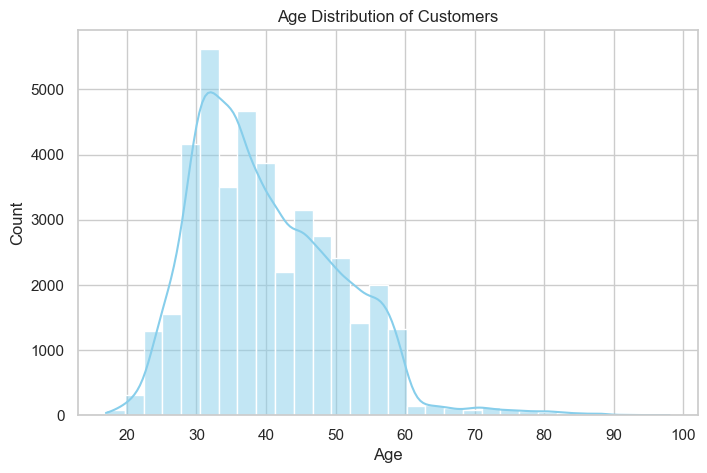

In [75]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

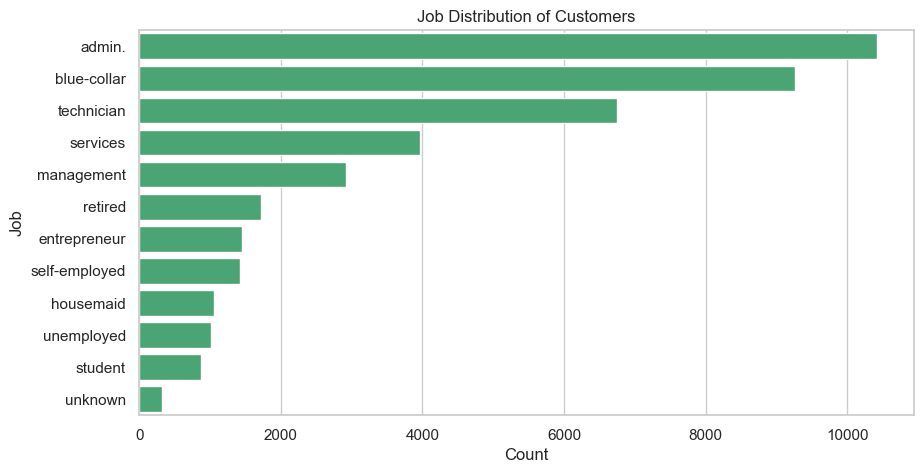

job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64


In [76]:
# Job distribution
plt.figure(figsize=(10,5))
sns.countplot(y='job', data=data, order=data['job'].value_counts().index, color='mediumseagreen')
plt.title('Job Distribution of Customers')
plt.xlabel('Count')
plt.ylabel('Job')
plt.legend([],[], frameon=False)
plt.show()
job_counts = data['job'].value_counts(normalize=True) * 100
print(job_counts)

## Balance & Deposit Trends

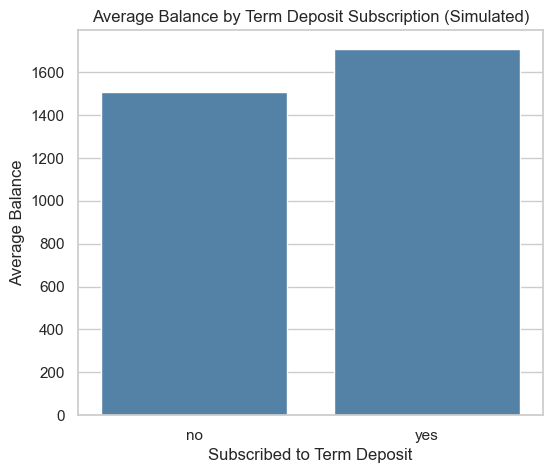

y
no     1507.921024
yes    1709.993444
Name: balance, dtype: float64


In [77]:
# Average balance by deposit subscription
# Since this dataset does not contain a 'balance' column, we simulate one to demonstrate average balance analysis. 
# Note: This is purely illustrative and not real customer data.

# Simulate a balance column
import numpy as np
np.random.seed(42)
# base random balance for all customers
base_balance = np.random.normal(1500, 800, len(data))

# slightly higher balance for those who subscribed ('y' == 'yes')
data['balance'] = base_balance + np.where(
    data['y'] == 'yes',
    np.random.normal(200, 100, len(data)),  # add small boost
    0
)

# Clip negative values to zero
data['balance'] = data['balance'].clip(lower=0)

# Average Balance by Term Deposit Subscription
plt.figure(figsize=(6,5))
sns.barplot(
    x='y',
    y='balance',
    data=data,
    estimator='mean',
    errorbar=None,
    color='steelblue'
)
plt.title('Average Balance by Term Deposit Subscription (Simulated)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Average Balance')
plt.show()

# Print exact average values
print(data.groupby('y')['balance'].mean())

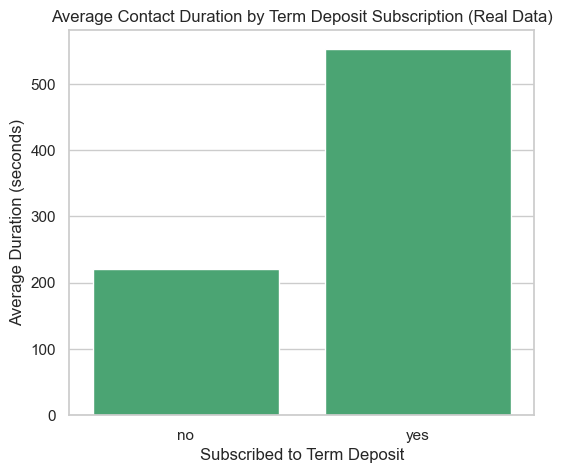

Average call duration by subscription:
y
no     220.844807
yes    553.191164
Name: duration, dtype: float64


In [78]:
# Using a real numeric variable as proxy
# We can use 'duration' (call duration) as a real numeric feature that affects subscription decisions.

plt.figure(figsize=(6,5))
sns.barplot(
    x='y',
    y='duration',
    data=data,
    estimator='mean',
    errorbar=None,
    color='mediumseagreen'
)
plt.title('Average Contact Duration by Term Deposit Subscription (Real Data)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Average Duration (seconds)')
plt.show()

# Print numeric averages for duration
print("Average call duration by subscription:")
print(data.groupby('y')['duration'].mean())

## Campaign Effectiveness

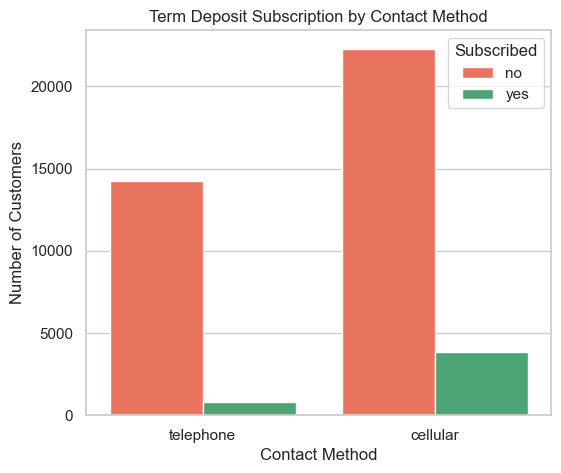

Percentage of subscription by contact method (%):
y             no    yes
contact                
cellular   85.26  14.74
telephone  94.77   5.23


In [79]:
# Contact method analysis
# Countplot of subscription by contact type
plt.figure(figsize=(6,5))
sns.countplot(x='contact', hue='y', data=data, palette={'no':'tomato', 'yes':'mediumseagreen'})
plt.title('Term Deposit Subscription by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Number of Customers')
plt.legend(title='Subscribed')
plt.show()

# Percentage table for insight
contact_summary = data.groupby('contact')['y'].value_counts(normalize=True).unstack() * 100
print("Percentage of subscription by contact method (%):")
print(contact_summary.round(2))

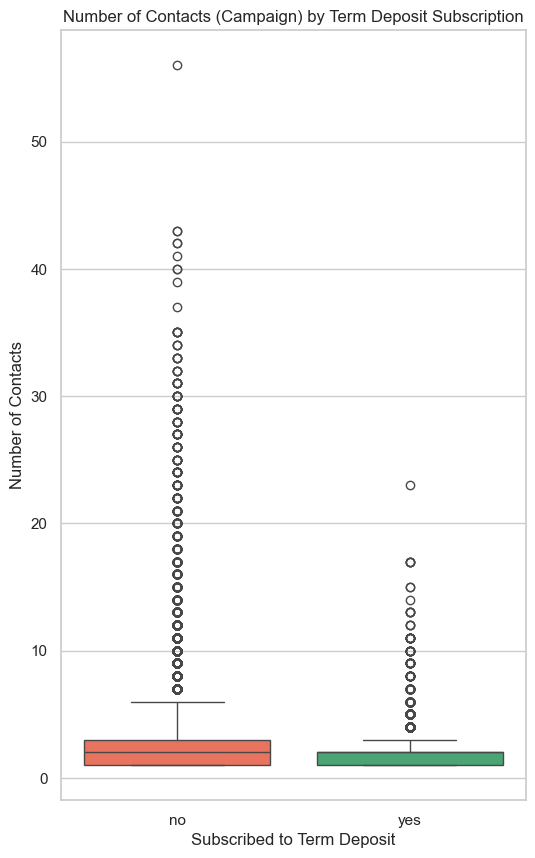

Average number of contacts by subscription:
y
no     2.63
yes    2.05
Name: campaign, dtype: float64


In [80]:
# Number of contacts vs deposit subscription
plt.figure(figsize=(6,10))

# Boxplot shows distribution of number of contacts for each subscription status
sns.boxplot(
    x='y',
    y='campaign',
    data=data,
    hue='y',
    dodge=False,
    palette={'no':'tomato', 'yes':'mediumseagreen'}
)

plt.title('Number of Contacts (Campaign) by Term Deposit Subscription')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Number of Contacts')
plt.show()

# -----------------------------
# Average number of contacts
# -----------------------------
avg_contacts = data.groupby('y')['campaign'].mean()
print("Average number of contacts by subscription:")
print(avg_contacts.round(2))

## Correlation Heatmap

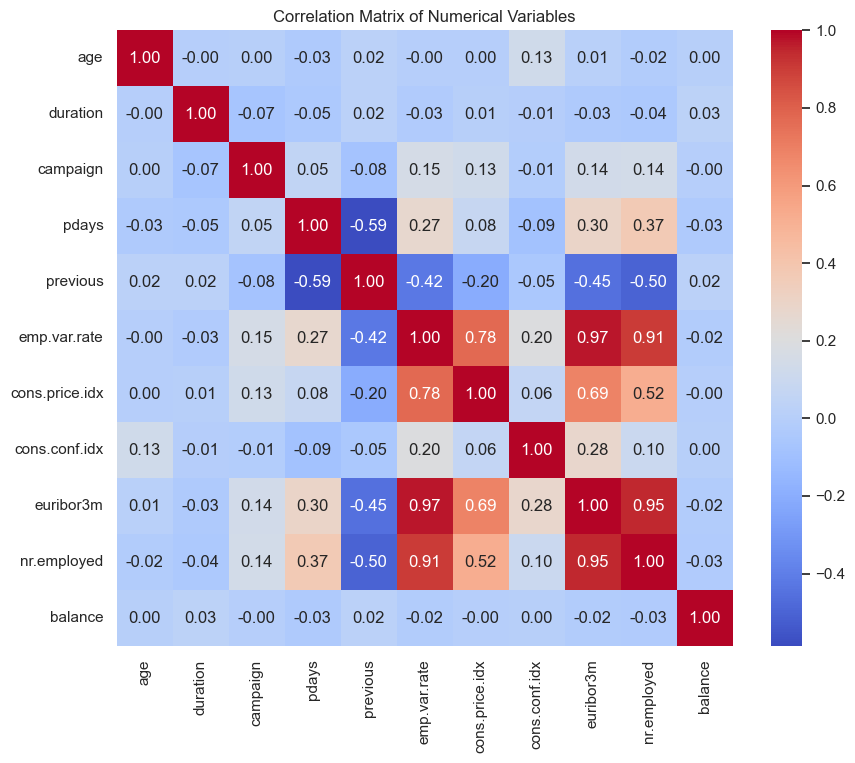

In [81]:
# Correlation of numerical variables
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values
    fmt=".2f",
    cmap='coolwarm',   # color map
    cbar=True,
    square=True
)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Predictive Modeling (Logistic Regression)

In [82]:
# Encode categorical variables

from sklearn.preprocessing import LabelEncoder

# Copying the dataset to avoid modifying original
df_encoded = data.copy()

# Encoding target variable
le_y = LabelEncoder()
df_encoded['y'] = le_y.fit_transform(df_encoded['y'])  # 'no'->0, 'yes'->1

# Identify categorical columns
cat_cols = df_encoded.select_dtypes(include=['object']).columns

# Encoding categorical features
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Check the encoded dataframe
df_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,balance
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1897.371322
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1389.388559
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2018.150830
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2718.423885
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1312.677300


In [83]:
from sklearn.model_selection import train_test_split

# Features (all columns except target)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#Predictions

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
lr_model = LogisticRegression(max_iter=5000, solver='saga')
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance (Logistic Regression Coefficients):")
print(coefficients)

In [ ]:
#Visualisation of coefficient
coefficients_sorted = coefficients.sort_values(by='Coefficient')

# Define colors: green for positive, red for negative
colors = coefficients_sorted['Coefficient'].apply(lambda x: 'mediumseagreen' if x > 0 else 'tomato').tolist()

#Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coefficients_sorted,
    hue='Feature',
    palette=colors
)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

## Key Takeaways
- Certain age groups and job categories are more likely to subscribe.
- Higher balances correlate with higher subscription rates.
- Cellular contact is more effective than telephone.
- Campaign duration and number of contacts influence outcomes.
- Logistic regression shows which features are strongest predictors.